## Multivariate Plots using Adapted Charts for Univariate and Bivariate

The data set used is fuel economy data.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import adaptedplot_solution_1, adaptedplot_solution_2

In [2]:
# Load the data
fuel_econ = pd.read_csv('./data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


## 1.0 Other Adaptations of Bivariate Plots to Multivariate Plots

One way of expanding univariate plots into bivariate plots is by substituting count on a bar chart or histogram for the mean, median, or some other statistic of a second variable. This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.

### 2.0 Adapted 2-d Histogram

If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the ```hist2d``` function similar to how we changed the weights in the 1-d histogram.

Below is a function that can transform a bivariate plot to a multivariate plot using ```hist2d```

In [23]:
def adaptation_bivariate_plot(df, num_var1, num_var2, num_var3):
    xbin_edges = np.arange(0, df[num_var1].max()+0.5, 0.5)
    ybin_edges = np.arange(0, df[num_var2].max()+0.5, 0.5)

    # count number of points in each bin
    xbin_idxs = pd.cut(df[num_var1], xbin_edges, right = False,
                       include_lowest = False, labels = False).astype(int)
    ybin_idxs = pd.cut(df[num_var2], ybin_edges, right = False,
                       include_lowest = False, labels = False).astype(int)

    pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
    pts_per_bin = pts_per_bin.reset_index()
    pts_per_bin = pts_per_bin.pivot(index = num_var1, columns = num_var2).values

    z_wts = df[num_var3] / pts_per_bin[xbin_idxs, ybin_idxs]

    # plot the data using the calculated weights
    plt.hist2d(data = df, x = num_var1, y = num_var2, weights = z_wts,
               bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5);
    plt.xlabel(num_var1)
    plt.ylabel(num_var2);
    plt.colorbar(label = 'mean(num_var3)');

### 3.0 Adapted HeatMap

Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

The code for the 2-d bar chart doesn't actually change much. The actual heatmap call is still the same, only the aggregation of values changes. Instead of taking size after the groupby operation, we compute the mean across dataframe columns and isolate the column of interest.

In [11]:
# Function for the adapted heatmap
def adapted_heat_map(df, cat_var1, cat_var2, num_var2):
    cat_means = df.groupby([cat_var1, cat_var2]).mean()[num_var2]
    cat_means = cat_means.reset_index(name = 'num_var2_avg')
    cat_means = cat_means.pivot(index = cat_var2, columns = cat_var1,
                            values = 'num_var2_avg')
    sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'});

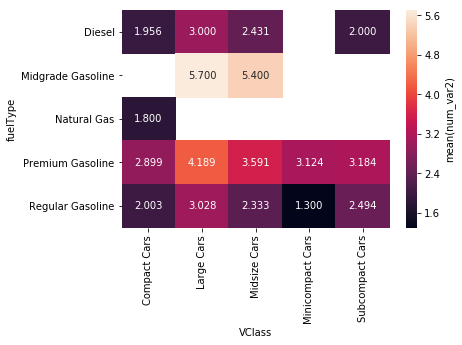

In [12]:
# Plot the adapted heat map
adapted_heat_map(fuel_econ, 'VClass', 'fuelType','displ')

### 4.0 Adapted Scatter Plot

**Task**: Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [3]:
def adaptedplot_solution_1():
  # data setup
  fuel_econ = pd.read_csv('./data/fuel_econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
  # plotting
  g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3)
  g.map(plt.scatter, 'city', 'highway', alpha = 1/5)

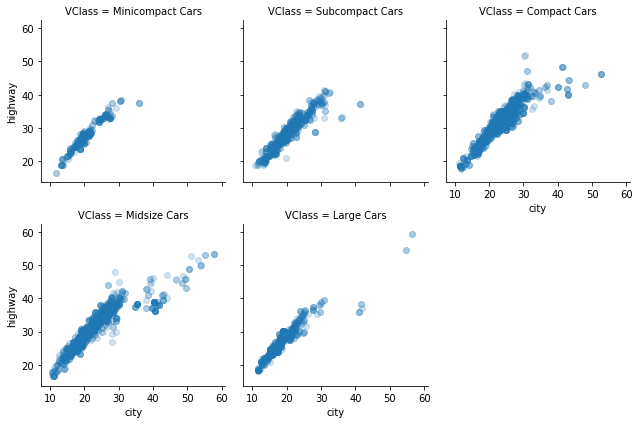

In [4]:
# Use the function to plot the scatter chart
adaptedplot_solution_1()

### 5.0 Adapted BoxPlot

**Task**: Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [5]:
def adaptedplot_solution_2():
  # data setup
  fuel_econ = pd.read_csv('./data/fuel_econ.csv')
  sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
  pd_ver = pd.__version__.split(".")
  if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
    fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
  else: # compatibility for v.20
    fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered = True, categories = sedan_classes)
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(['Premium Gasoline', 'Regular Gasoline'])]
  # plotting
  sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', hue = 'fuelType')
  plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
  plt.xticks(rotation = 15)

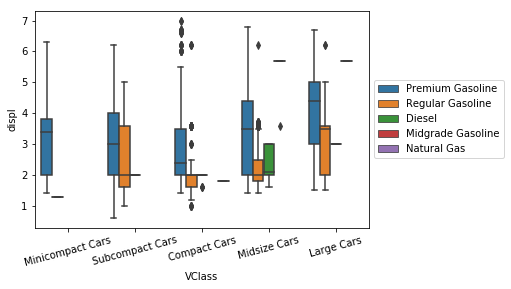

In [6]:
# run this cell to check your work against ours
adaptedplot_solution_2()

### 6.0 Adapted Bar Plot

An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the ```barplot``` function instead of the ```countplot``` function:

In [54]:
# Function for ploting the adapted bar chart
def adapted_bar_plot(df, cat_var1, num_var2, cat_var2):
    plt.figure(figsize=[12,6])
    ax = sb.barplot(data = df, x = cat_var1, y = num_var2, hue = cat_var2)
    ax.legend(loc = 'upper left', ncol = 2, framealpha = 1, title = cat_var2)
    plt.title('Bar Chart for {}, {} and {}'.format(cat_var1,num_var2, cat_var2), weight='bold', fontsize=12);

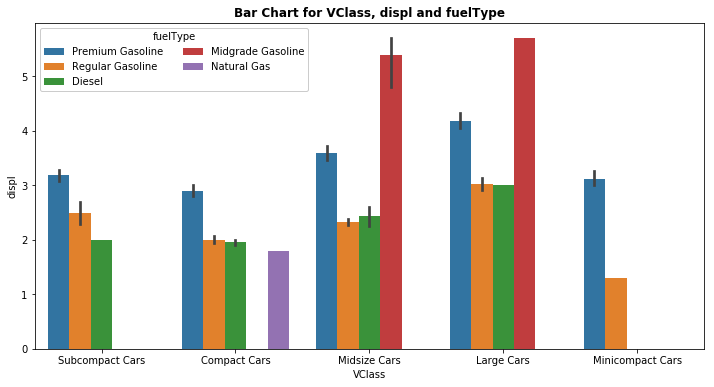

In [55]:
# Use the adapted_bar_plot function above to plot a bar chart
adapted_bar_plot(fuel_econ, 'VClass', 'displ', 'fuelType')

### 7.0 Adapted Point Plot
The "hue" parameter can also be used in a similar fashion in the ```boxplot```, ```violinplot```, and ```pointplot``` functions to add a categorical third variable to those plots in a clustered fashion. As a special note for ```pointplot```, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

In [79]:
# Create a point plot function
def adapted_point_plot(df, cat_var1, num_var2, cat_var2):
    """ This function plots a point plot and takes in three variables.
    INPUT: Two categorical variables and one numeric variable
    OUTPUT: Adapted Point Plot"""
    plt.figure(figsize=[10,6])
    ax = sb.pointplot(data = df, x = cat_var1, y = num_var2, hue = cat_var2,
                  dodge = 0.3, linestyles = "")
    ax.legend(loc = 'upper left')
    plt.xticks(rotation=90)
    plt.title('Point Plot for {}, {} and {}'.format(cat_var1, num_var2, cat_var2), weight='bold', fontsize=12);


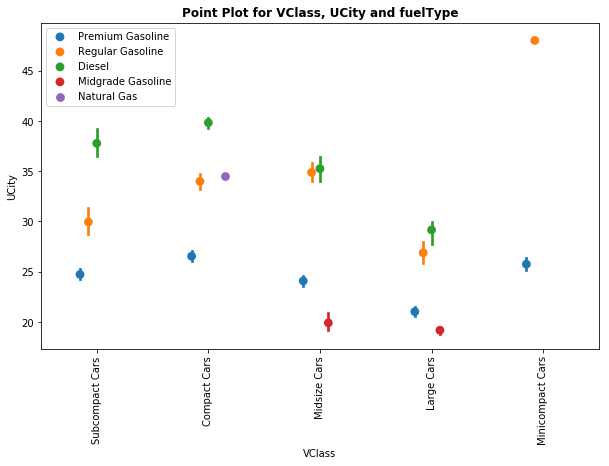

In [80]:
# plot the adapted point plot
adapted_point_plot(fuel_econ, 'VClass', 'UCity', 'fuelType')

### 8.0 Line Plot
As a final example, a line plot can be adapted from frequency polygons for levels of a categorical variable. In this case, we create a custom function to send to a FacetGrid object's ```map``` function that computes the means in each bin, then plots them as lines via ```errorbar```.

In [81]:
# function that computes means in each bin
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

In [94]:
# Create grid function
def adapted_line_chart(df, num_var1, cat_var2, num_var2):
    """A function that defines the labels, bins, hue, title"""
    bin_edges = np.arange(0.25, fuel_econ[num_var1].max()+0.5, 0.5)
    g = sb.FacetGrid(data = df, hue = cat_var2, size = 10)
    
    # map the mean values to the data
    g.map(mean_poly, num_var1, num_var2, bins = bin_edges)
    
    # set the axis limits, title and legend
    g.set_ylabels('mean(num_var2)')
    plt.xlim(0,10)
    plt.title('Line Chart for {}, {} and {}'.format(num_var1, cat_var2, num_var2))
    g.add_legend();

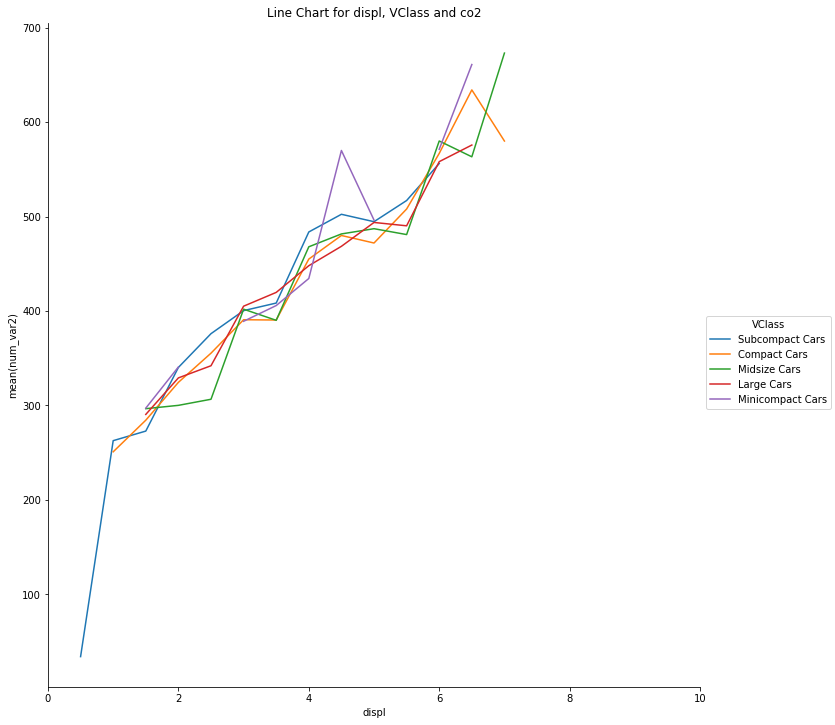

In [95]:
# Plot the line plot using the function above
adapted_line_chart(fuel_econ, 'displ', 'VClass', 'co2')